# Training SVM mit Scikit-Learn

```{admonition} Lernziele
:class: hint
* Sie können ein SVM-Modell mit Scikit-Learn trainieren.
```

## Scikit-Learn bietet mehrere Implementierungen

Wenn wir in der Dokumentation von Scikit-Learn
[Scikit-Learn/SVM](https://scikit-learn.org/stable/modules/svm.html) die Support
Vector Machines nachschlagen, so finden wir drei Einträge

* SVC, 
* NuSVC und 
* LinearSVC.

Die Beispiele des letzten Abschnittes sind linearer Natur, so dass sich
eigentlich die Klasse "LinearSVC" aus Effiziengründen anbieten würde. Da wir
aber im nächsten Abschnitt uns auch mit nichtlinearen Problemen beschäftigen
werden, fokussieren wir uns gleich auf den SVC-Algorithmus mit seinen Optionen.
NuSVC ist ähnlich zu SVC, bietet aber die zusätzliche Möglichkeit, die Anzahl
der Stützvektoren einzuschränken.

Vielleicht wundern Sie sich, dass die Klasse SVC und nicht SVM heißt. Das C in
SVC soll deutlich machen, dass wir die Support Vector Machines nutzen wollen, um
ein Klassifikationsproblem (= Classification Problem) zu lösen.

## Training mit fit und score

Zuerst importieren wir aus Scikit-Learn das entsprechende Modul 'SVM' und
instantiieren ein Modell. Da wir die etwas allgemeinere Klasse SVC anstatt
LinearSVC verwenden, müssen wir bereits bei der Erzeugung die Option `kernel=`
auf linear setzen, also `kernel='linear'`.

In [55]:
from sklearn import svm
svm_modell = svm.SVC(kernel='linear')

Wir erzeugen uns erneut künstliche Messdaten.

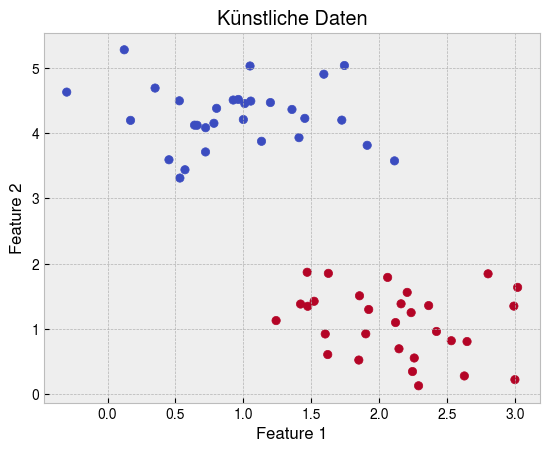

In [56]:
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt; plt.style.use('bmh')
plt.rcParams['font.family'] = ['TeX Gyre Heros', 'sans-serif']

# generate artificial data
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.50)

# plot artificial data
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Daten');

Als nächstes teilen wir die Messdaten in Trainings- und Testdaten auf.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Nun können wir unser SVM-Modell trainieren:

In [58]:
svm_modell.fit(X_train, y_train);

Und als nächstes analysieren, wie viele der Testdaten mit dem trainierten Modell
korrekt klassifiziert werden.

In [59]:
svm_modell.score(X_test, y_test)

1.0

Ein super Ergebnis! Schön wäre es jetzt noch, die gefundene Trenngerade zu
visualisieren. Dazu modifizieren wir einen Code-Schnippsel aus dem Buch: »Data
Science mit Python« von Jake VanderPlas (mitp Verlag 2017), ISBN 978-3-95845-
695-2, siehe
[https://github.com/jakevdp/PythonDataScienceHandbook](https://github.com/jakevdp/PythonDataScienceHandbook).



In [60]:
# Quelle: VanderPlas "Data Science mit Python", S. 482
# modified by Simone Gramsch
import numpy as np

def plot_svc_grenze(model):
    # aktuelles Grafik-Fenster auswerten
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Raster für die Auswertung erstellen
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # Entscheidungsgrenzen und Margins darstellen
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # Stützvektoren darstellen
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='orange');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

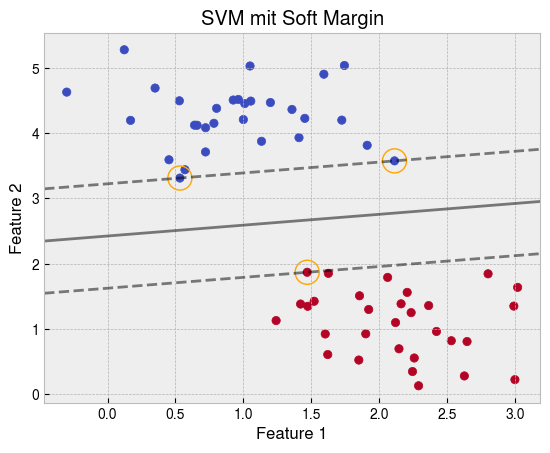

In [61]:

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('SVM mit Soft Margin');

plot_svc_grenze(svm_modell)


## Der Parameter C

Im letzten Abschnitt haben wir uns mit dem Parameter `C` beschäftigt, der
Ausnahmen innerhalb des Sicherheitsstreifens erlaubt. Ein großes `C` bedeutet
ja, dass die Wand des Margins hoch ist und kaum (oder gar keine) Punkte
innerhalb des Sicherheitsstreifens liegen dürfen. Als nächstes schauen wir uns
an, wie der Parameter `C` gesetzt wird.  

Die Option zum Setzen des Parameters C lautet schlicht und einfach `C=`. Dabei
muss C immer positiv sein.

Damit aber besser sichtbar wird, wie sich C auswirkt, vermischen wir die
künstlichen Daten stärker.

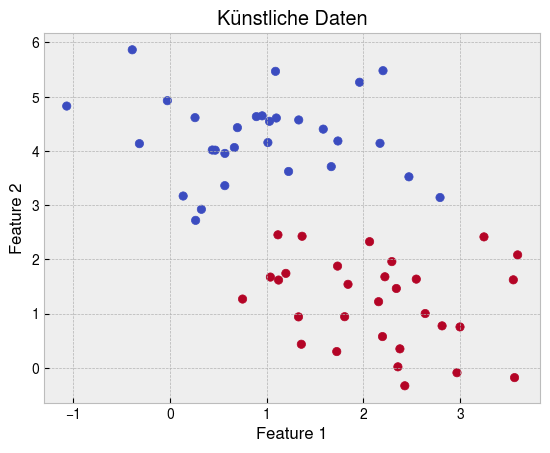

In [70]:
# generate artificial data
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.80)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plot artificial data
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Daten');

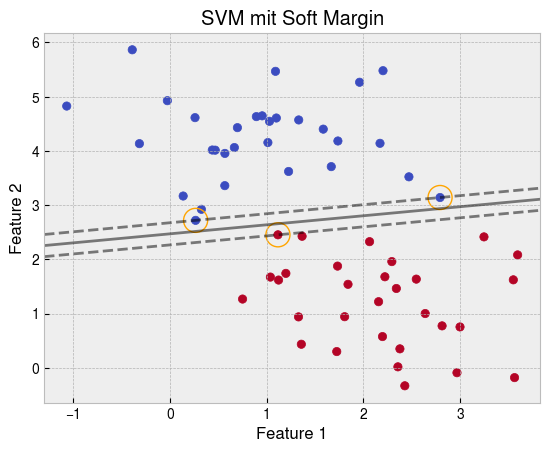

In [72]:
# Wahl des Modells mit linearem Kern und großem C
svm_modell = svm.SVC(kernel='linear', C=1000000)

# Training und Bewertung
svm_modell.fit(X_train, y_train);
svm_modell.score(X_test, y_test)

# Visualisierung
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('SVM mit Soft Margin');
plot_svc_grenze(svm_modell)



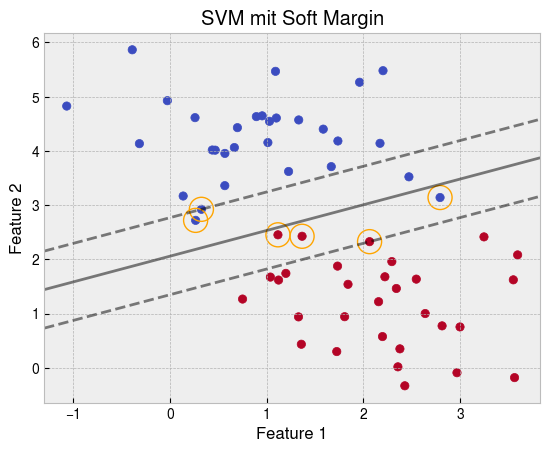

In [73]:
# Wahl des Modells mit linearem Kern und kleinem C
svm_modell = svm.SVC(kernel='linear', C=1)

# Training und Bewertung
svm_modell.fit(X_train, y_train);
svm_modell.score(X_test, y_test)

# Visualisierung
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('SVM mit Soft Margin');
plot_svc_grenze(svm_modell)


## Zusammenfassung

Verwenden wir den SVC-Klassifikator aus dem Modul SVM von Scikit-Learn, können
wir mittels der Option `kernel='linear'` eine binäre Klassifikation durchführen,
bei der die Trennungsgerade den größtmöglichen Abstand zwischen den
Punkteclustern erzeugt, also einen möglichst großen Margin. Sind die Daten nicht
linear trennbar, so können wir mit der Option `C= ` steuern, wie viele Ausnahmen
erlaubt werden sollen. Mit Ausnahmen sind Punkte innerhalb des Margins gemeint.
Im nächsten Abschnitt betrachten wir nichtlineare Trennungsgrenzen.